## Regresión lineal: Costo de un incidente de seguridad.

Este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado
con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto
afectados. El conjunto de datos es generado de manera aleatoria.

### 1.- Generación del conjunto de datos.

In [1]:
import numpy as np
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
print("La longitud del conjunto de datos es: ", len(x))

La longitud del conjunto de datos es:  100


### 2.- Visualización del conjunto de datos

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

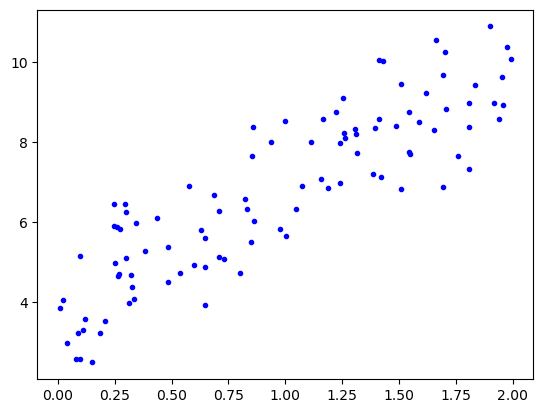

In [3]:
plt.plot(x,y,'b.')
plt.show()

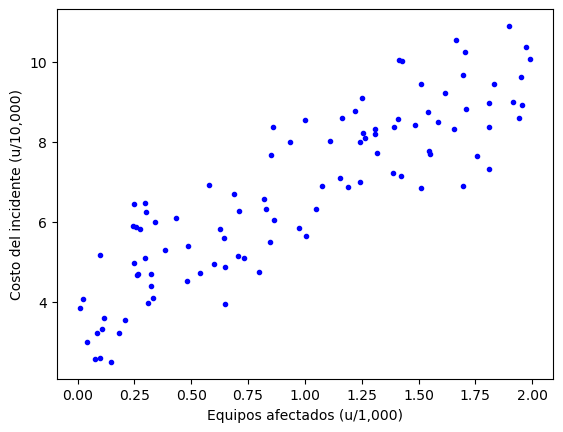

In [4]:
plt.plot(x,y,'b.')
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

## Modificar el conjunto de datos

In [5]:
import pandas as pd

In [6]:
data = {'N°_Equipos_Afectados': x.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,N°_Equipos_Afectados,Costo
0,0.862790,6.030382
1,1.807953,7.319873
2,1.664991,10.547529
3,1.758137,7.644920
4,0.098600,5.162402
5,1.306902,8.318718
6,0.297419,5.101488
7,1.421121,7.139141
8,0.857809,8.369946
9,0.077977,2.568584


In [7]:
# Escalado del número de equipos afectados 
df['N°_Equipos_Afectados'] = df['N°_Equipos_Afectados'] * 1000
df['N°_Equipos_Afectados'] = df['N°_Equipos_Afectados'].astype('int')
# Escalar el costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,N°_Equipos_Afectados,Costo
0,862,60303
1,1807,73198
2,1664,105475
3,1758,76449
4,98,51624
5,1306,83187
6,297,51014
7,1421,71391
8,857,83699
9,77,25685


Text(0, 0.5, 'Costo del Incidente')

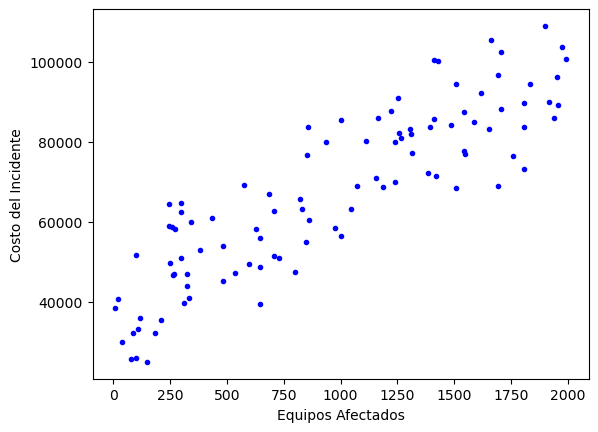

In [8]:
# Representación gráfica del conjunto de datos
plt.plot(df['N°_Equipos_Afectados'],df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")

### 4.- Construcción del modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [18]:
# Construcción del modelo y ajuste de la función de hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['N°_Equipos_Afectados'].values.reshape(-1,1),df['Costo'].values)

LinearRegression()

In [11]:
# Parámetro Theta 0 
lin_reg.intercept_

38239.808768292416

In [12]:
# Parámetro Theta 1
lin_reg.coef_

array([30.32688926])

In [13]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
x_min_mx = np.array([[df["N°_Equipos_Afectados"].min()],[df["N°_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(x_min_mx)

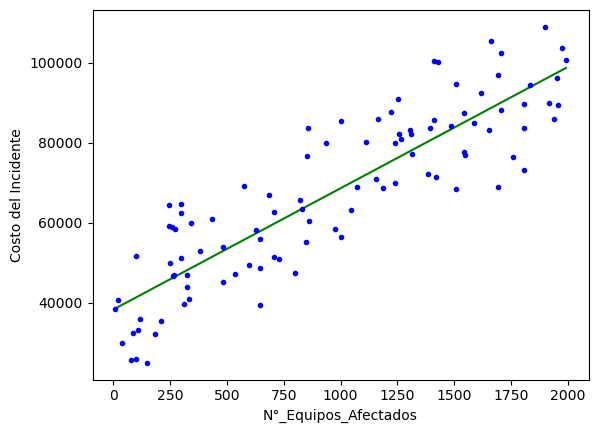

In [14]:
# Representación gráfica de la función hipótesis generada
plt.plot(x_min_mx, y_train_pred,"g-")
plt.plot(df["N°_Equipos_Afectados"], df["Costo"], "b.")
plt.xlabel("N°_Equipos_Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

### 5.- Predicción de nuevos ejemplos

In [15]:
x_new = np.array([[4800]]) #1300 equipos afectados
#Predicción del costo que tendría el incidente
Costo = lin_reg.predict(x_new)
print("El costo del incidente sería: $", int(Costo[0]))

El costo del incidente sería: $ 183808


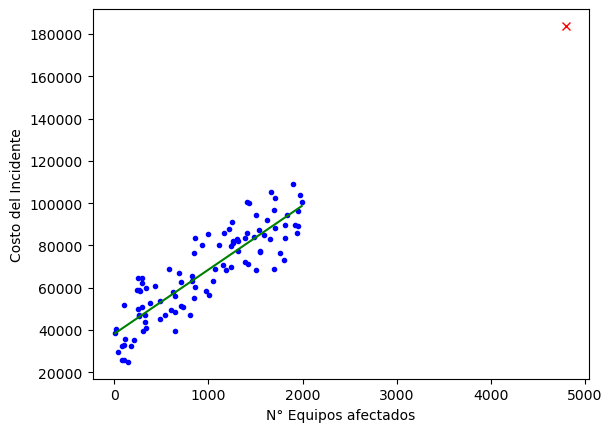

In [19]:
plt.plot(df["N°_Equipos_Afectados"], df["Costo"], "b.")
plt.plot(x_min_mx, y_train_pred, "g-")
plt.plot(x_new, Costo, "rx")
plt.xlabel("N° Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()